In [27]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',2)
pd.options.display.float_format = '{:.0f}'.format
data = pd.read_csv('F:/Ben & Matt Project/Training Data/Old/train_V2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


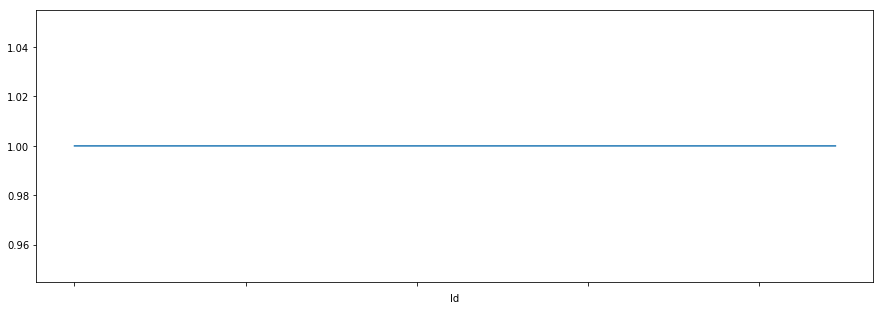

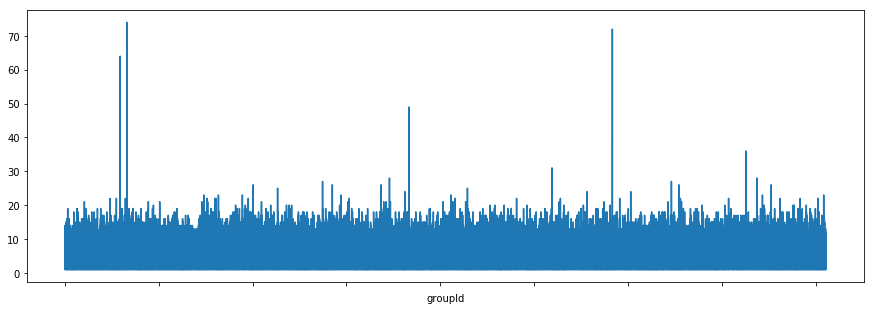

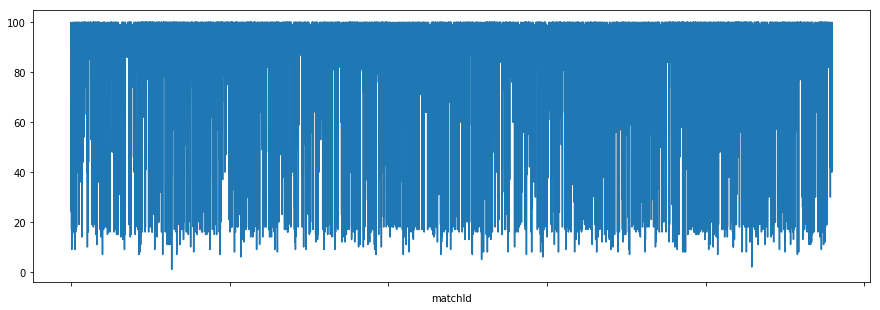

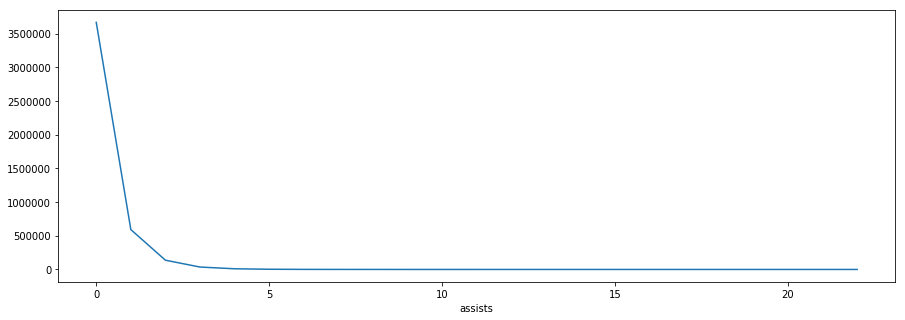

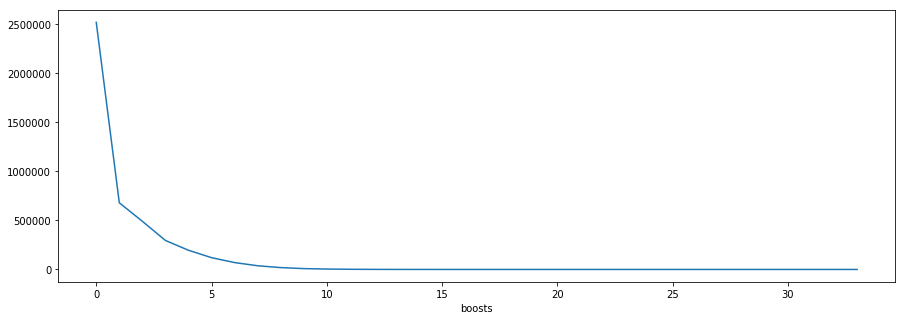

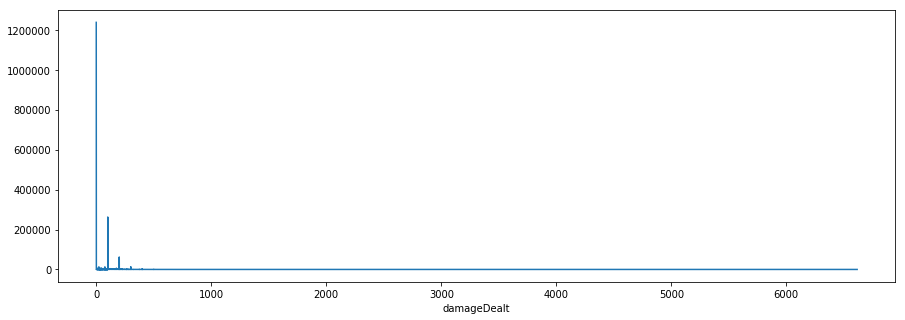

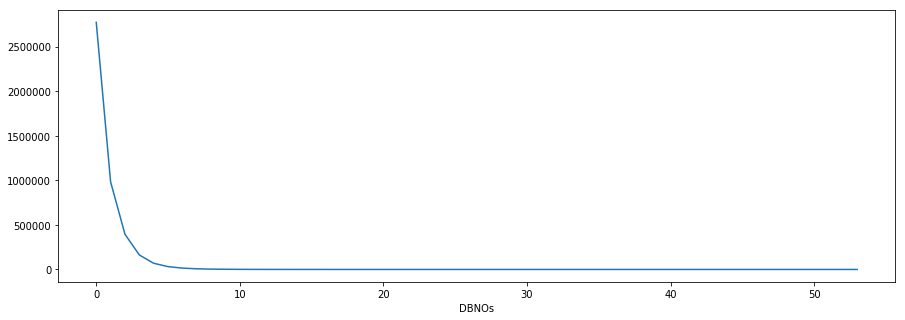

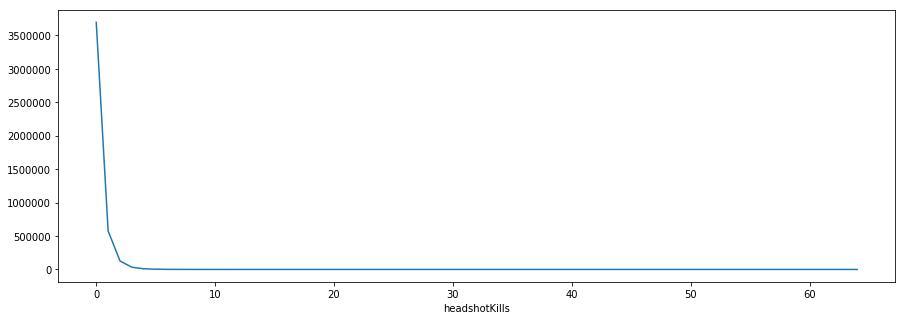

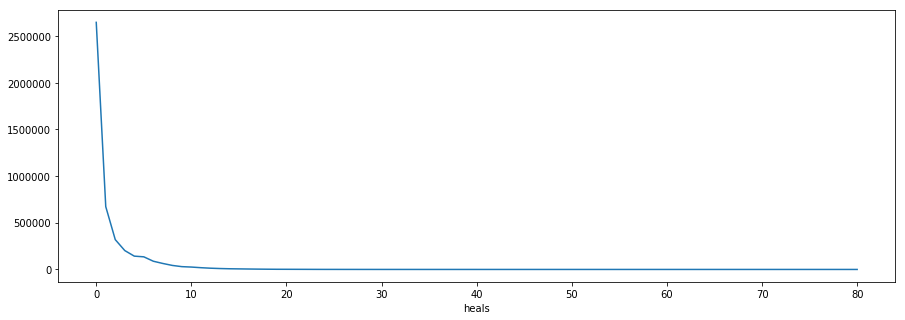

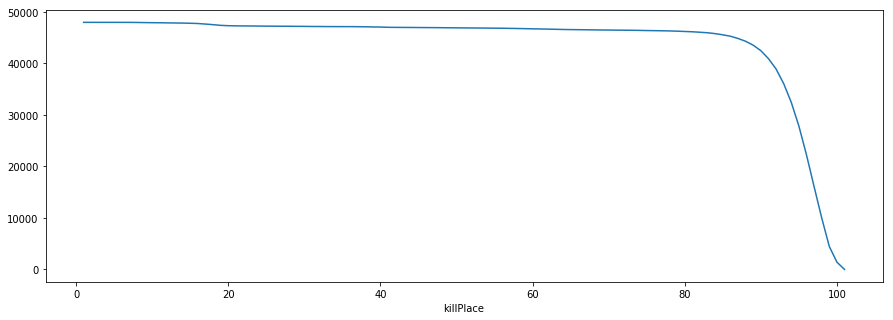

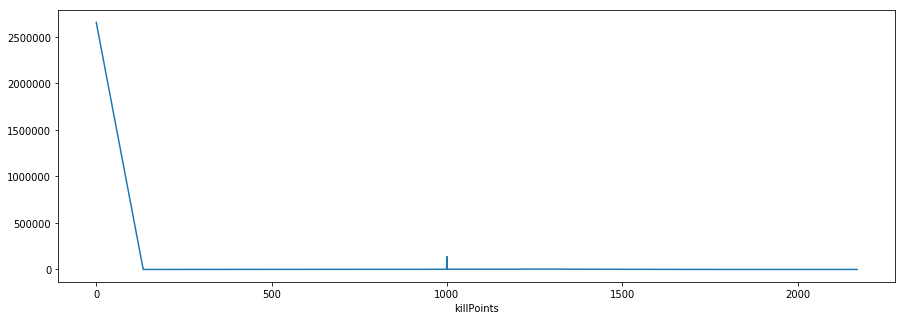

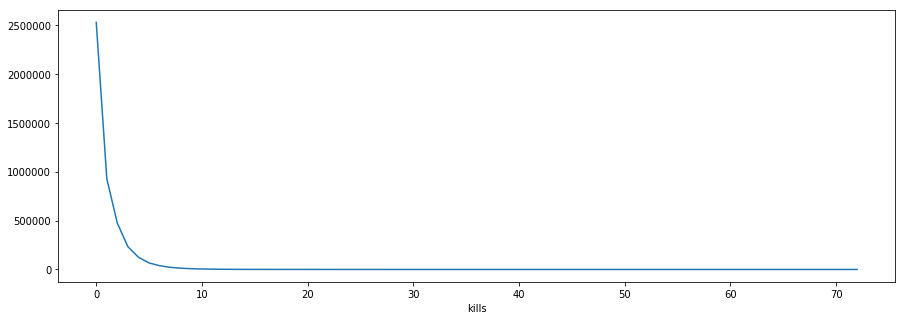

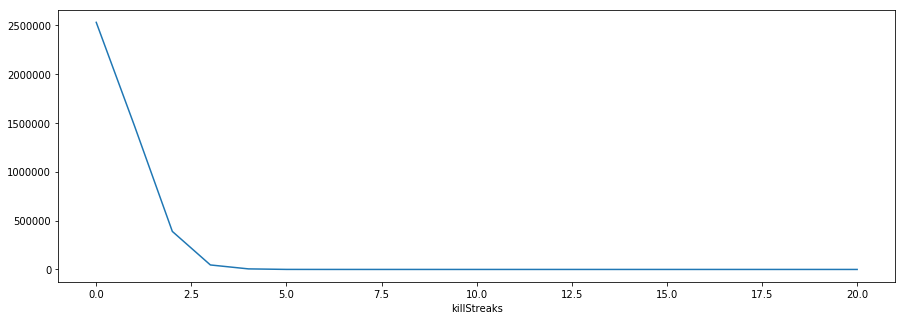

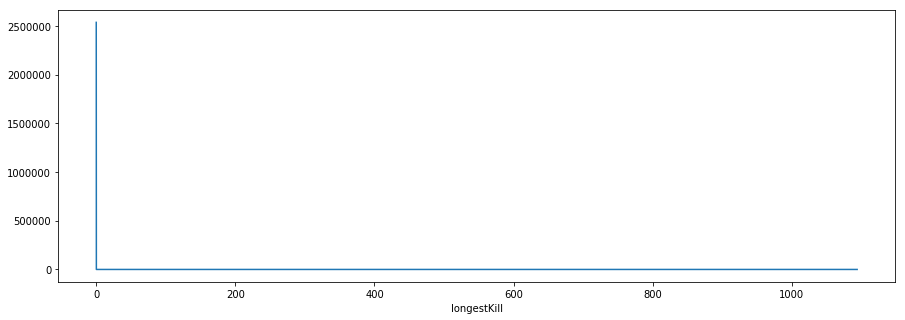

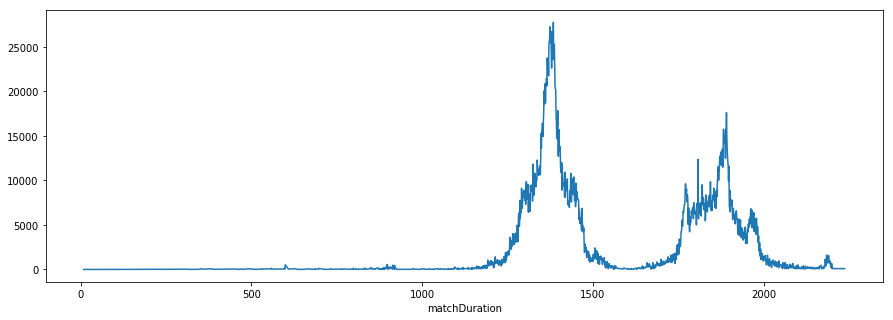

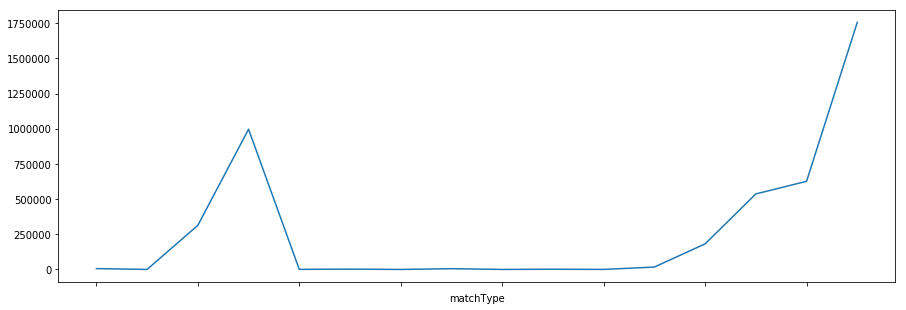

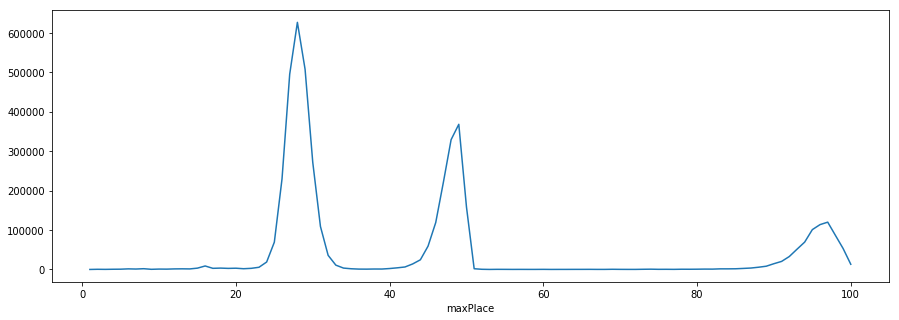

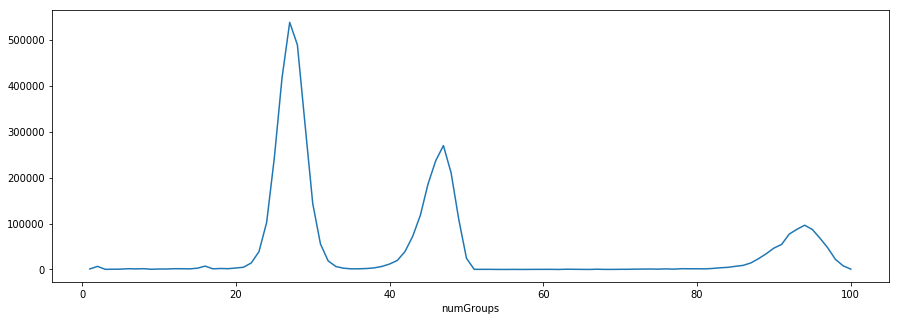

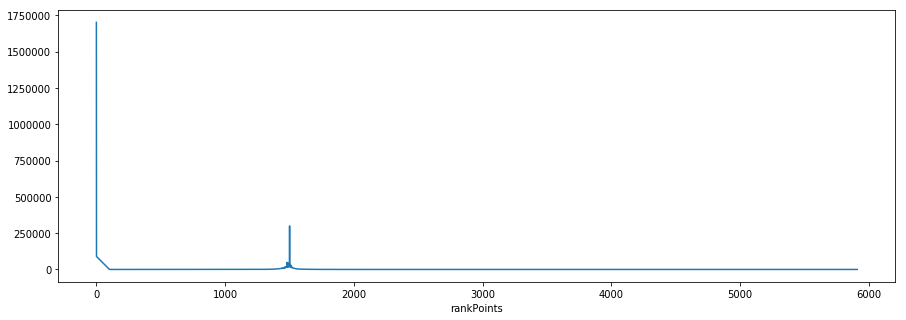

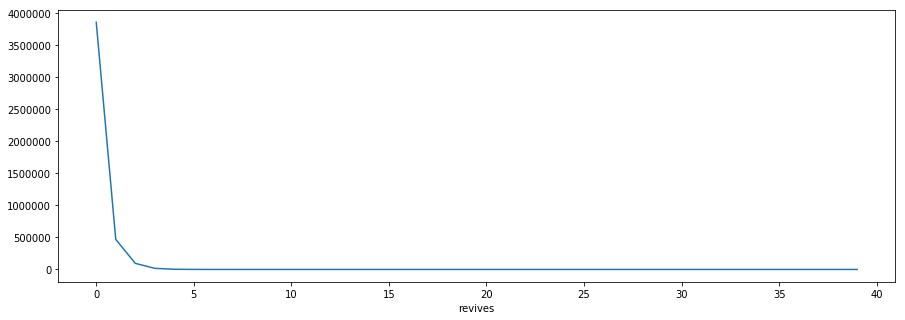

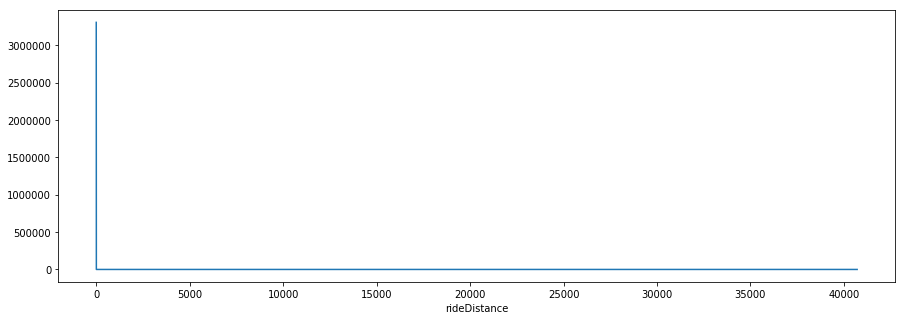

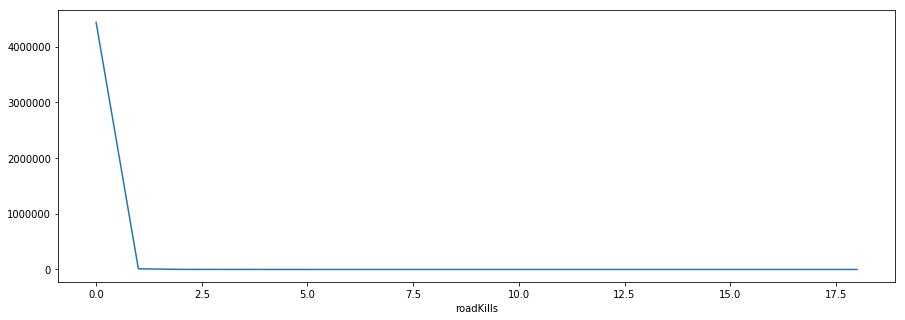

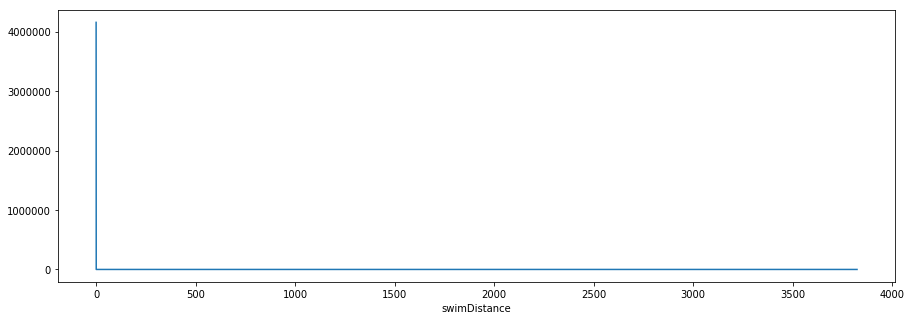

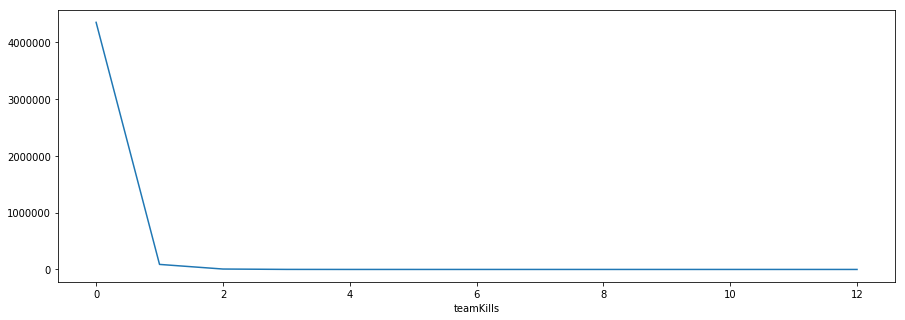

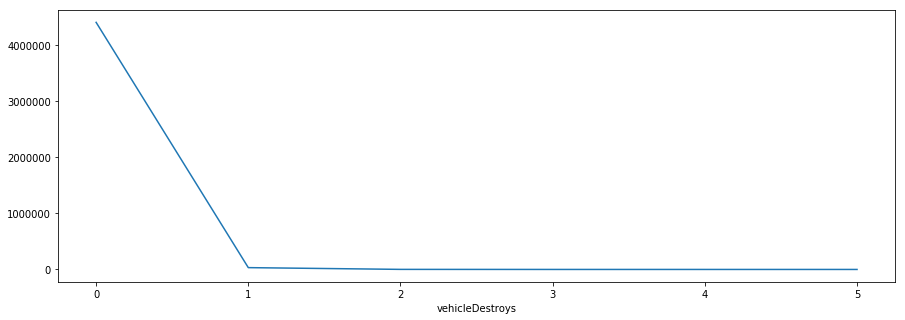

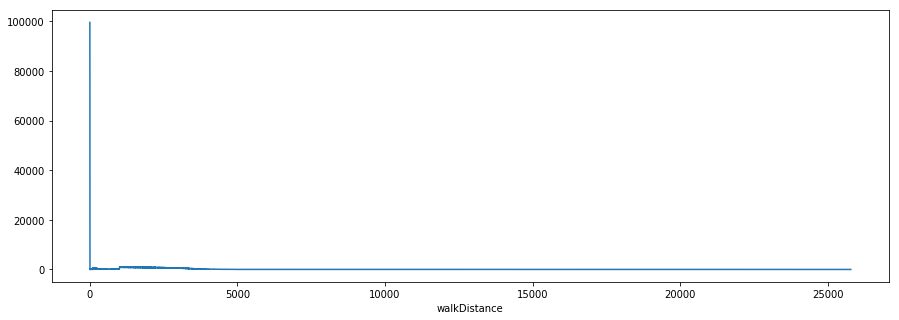

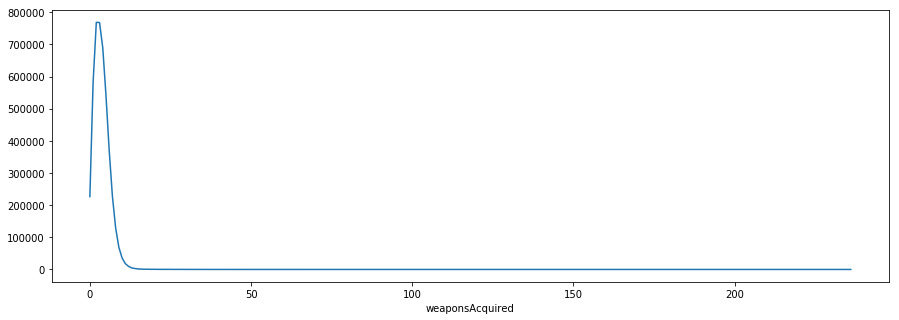

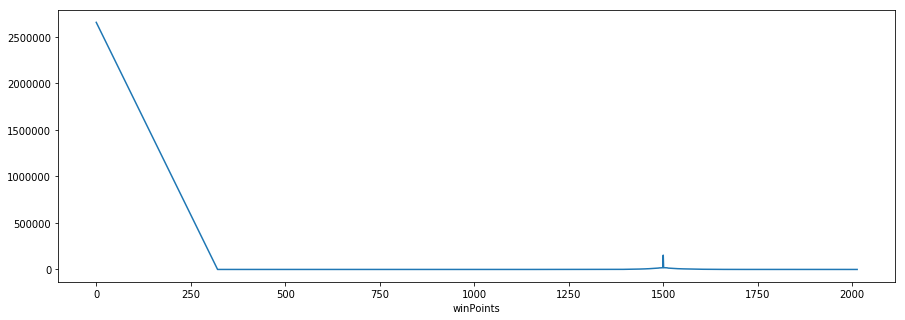

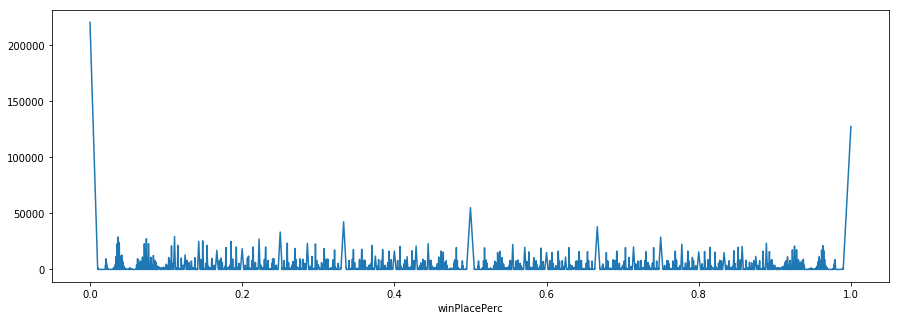

In [14]:
import matplotlib.pyplot as plt
listing=['walkDistance', 'kills']
count=0
for col in data:
   dist=data.groupby(col)[col]
   stuff = dist.count()
   stuff.plot(kind='line', figsize=(15,5))
   count+=1
   plt.show()


In [11]:
pd.options.display.float_format = '${:,.2f}'.format
asdf

In [12]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.00,0,0.00,0,0,244.80,1,1466,0.44
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.00,0,11.04,0,0,"1,434.00",5,0,0.64
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.00,0,0.00,0,0,161.80,2,0,0.78
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.00,0,0.00,0,0,202.70,3,0,0.17
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.00,0,0.00,0,0,49.75,2,0,0.19


In [15]:
data['DBNO-Kills'] = data['DBNOs']-data['kills']
data['kills*kill%'] = data['kills']*data['killPlace']
data['log_longestkill'] = np.log(data.longestKill)




In [50]:
data['group_size'] = data.groupby(['groupId','matchId','maxPlace','winPlacePerc','matchDuration'])['groupId','matchId','maxPlace','winPlacePerc','matchDuration'].transform('count')
print(data[['group_size','groupId','matchId']])
#data[(data['groupId']=='289a6836a88d27') & (data['matchId']=='bac52627a12114') ]


         group_size         groupId         matchId
0          4.000000  4d4b580de459be  a10357fd1a4a91
1          4.000000  684d5656442f9e  aeb375fc57110c
2          2.000000  6a4a42c3245a74  110163d8bb94ae
3          1.000000  a930a9c79cd721  f1f1f4ef412d7e
4          1.000000  de04010b3458dd  6dc8ff871e21e6
5         10.000000  289a6836a88d27  bac52627a12114
6          6.000000  2c485a1ad3d0f1  a8274e903927a2
7          1.000000  eaba5fcb7fc1ae  292611730ca862
8          3.000000  47cfbb04e1b1a2  df014fbee741c6
9          3.000000  759bb6f7514fd2  3d3031c795305b
10         5.000000  c549efede67ad3  2dd6ddb8320fc1
11         3.000000  f643df9df3877c  80170383d90003
12         3.000000  da24cdb91969cc  535b5dbd965a94
13         1.000000  3c08e461874749  2c30ddf481c52d
14         3.000000  d40d0c7d3573a1  94e1c1cc443c65
15         2.000000  fe52d481bae68b  6fd9e765ddd0c5
16         5.000000  f61b698274d9f5  1d6cfe0f6f23b0
17         1.000000  2f2c33f548c4b9  07948d723b9c0f
18         4

In [41]:
pd.options.display.float_format = '{:,.6f}'.format
data[(data['groupId']=='289a6836a88d27') & (data['matchId']=='bac52627a12114') ]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,group_size
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000000,1,1,0,44,...,0.000000,0,0.000000,0,0,34.700000,1,0,0.037000,10
732188,ab998f8ad6854c,289a6836a88d27,bac52627a12114,0,0,183.300000,3,0,0,13,...,0.000000,0,0.000000,0,0,123.300000,4,0,0.037000,10
1181355,e0724fc677b936,289a6836a88d27,bac52627a12114,0,0,0.000000,0,0,0,89,...,0.000000,0,0.000000,0,0,7.224000,0,0,0.037000,10
1563278,ec5569568c2704,289a6836a88d27,bac52627a12114,0,1,0.000000,0,0,0,86,...,0.000000,0,0.000000,0,0,42.820000,0,0,0.037000,10
1842178,4722aa015adb7a,289a6836a88d27,bac52627a12114,0,0,18.000000,0,0,0,88,...,0.000000,0,0.000000,0,0,9.959000,0,0,0.037000,10
2428699,cb57c2ab99abb7,289a6836a88d27,bac52627a12114,0,0,57.200000,0,0,0,90,...,0.000000,0,0.000000,0,0,25.430000,1,0,0.037000,10
2906638,1c013eb328e515,289a6836a88d27,bac52627a12114,1,0,72.540000,0,0,0,85,...,0.000000,0,0.000000,0,0,34.680000,1,0,0.037000,10
3427744,8ddb8e5eb88698,289a6836a88d27,bac52627a12114,0,0,0.000000,0,0,0,87,...,0.000000,0,0.000000,0,0,0.000000,0,0,0.037000,10
4415944,1352f89970e61f,289a6836a88d27,bac52627a12114,0,0,0.000000,0,0,0,84,...,0.000000,0,0.000000,0,0,116.200000,0,0,0.037000,10
4418086,00072862cddea2,289a6836a88d27,bac52627a12114,0,0,38.700000,0,0,0,83,...,0.000000,0,0.000000,0,0,111.500000,3,0,0.037000,10


In [48]:
data[['group_size','Id']].groupby('group_size').count()

,Id
group_size,
1,792277
2,1308422
3,741411
4,870160
5,267130
6,155250
7,103516
8,67376
9,43488


In [60]:
#data['DBNO-Kills'] = data['DBNOs']-data['kills']
#data['kills*kill%'] = data['kills']*data['killPlace']
#data['log_longestkill'] = np.log(data.longestKill)

#data['vehicle_use'] = 0
#data.loc[(data['rideDistance'] > 0),'vehicle_use'] = 1

#data['water_use'] = 0
#data.loc[(data['swimDistance'] > 0),'water_use'] = 1

#data['rotten_team'] = 0
#data.loc[(data['teamKills'] > 0),'rotten_team'] = 1

data['weaponsbin']=pd.cut(data['weaponsAcquired'],5)
print(pd.cut(data['weaponsAcquired'],5).unique())






[(-0.236, 47.2], (47.2, 94.4], (94.4, 141.6], (141.6, 188.8], (188.8, 236.0]]
Categories (5, interval[float64]): [(-0.236, 47.2] < (47.2, 94.4] < (94.4, 141.6] < (141.6, 188.8] < (188.8, 236.0]]
